In [39]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
import time
from numpy.random import rand
import random
import cv2
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.datasets import fetch_openml
from sklearn.datasets import fetch_olivetti_faces

In [29]:
from CCE_algorithm import CCE
# input (connectivity, max_iteration, target_center, check)
# output (n_center, center_id, label, n_cut)
from CCE_algorithm import connectivity_matrix
# input (X, sigma)
# output (similarity matrix)
from CCE_algorithm import enhanced_connectivity_matrix
# input (X, sigma, epsilon)
# output (enhanced matrix)|
from CCE_algorithm_new import CCE_experiment

# mnist data set

In [20]:
def Experiment(X,y,sigma,epsilon=0,max_it=1000, check=100, num_cluster = None):
    start_time = time.time()
    
    if num_cluster == None :
        n_cluster = len(set(list(y)))
    else :
        n_cluster = num_cluster
    
    if epsilon ==0 :
        S = connectivity_matrix(X,sigma)
    else :
        S = enhanced_connectivity_matrix(X,sigma,epsilon)
    result = CCE(S,max_it,n_cluster,check)
    runtime = (time.time() - start_time)
    iteration = len(result[0])
    ARI = adjusted_rand_score(result[2], np.array(y))
    NMI = normalized_mutual_info_score(result[2], np.array(y))
    return np.array([result[2], iteration, ARI, NMI, runtime, epsilon])

In [24]:
def Experiment2(X,y,sigma,epsilon=0,max_it=1000, check=100, num_cluster = None):
    start_time = time.time()
    
    if num_cluster == None :
        n_cluster = len(set(list(y)))
    else :
        n_cluster = num_cluster
    
    if epsilon ==0 :
        S = connectivity_matrix(X,sigma)
    else :
        S = enhanced_connectivity_matrix(X,sigma,epsilon)
    result = CCE_experiment(S,y,max_it,n_cluster,check)
    runtime = (time.time() - start_time)
    iteration = len(result[0])
    ARI = adjusted_rand_score(result[2], np.array(y))
    
    return np.array([result[2], iteration, result[3], ARI, result[4]])

In [7]:
face = fetch_olivetti_faces()

In [14]:
face['data'].shape

(400, 4096)

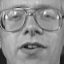

In [15]:
image = Image.fromarray(face['images'][10]*255)
image.convert('RGB')

In [148]:
face['data'][0].max()

0.87603307

In [392]:
sampled_data = face['data'][:40]
sampled_label = face['target'][:40]

In [393]:
Experiment(sampled_data, sampled_label, 2, epsilon=0, max_it= 70000, check=1000)

order of connectivity matrix = 1
number of cluster center = 40
...
order of connectivity matrix = 1001
number of cluster center = 22
...
order of connectivity matrix = 2001
number of cluster center = 17
...
order of connectivity matrix = 3001
number of cluster center = 15
...
order of connectivity matrix = 4001
number of cluster center = 14
...
order of connectivity matrix = 5001
number of cluster center = 13
...
order of connectivity matrix = 6001
number of cluster center = 11
...
order of connectivity matrix = 7001
number of cluster center = 10
...
order of connectivity matrix = 8001
number of cluster center = 10
...
order of connectivity matrix = 9001
number of cluster center = 8
...
order of connectivity matrix = 10001
number of cluster center = 7
...
order of connectivity matrix = 11001
number of cluster center = 7
...
order of connectivity matrix = 12001
number of cluster center = 7
...
order of connectivity matrix = 13001
number of cluster center = 7
...
order of connectivity ma

<ipython-input-20-55ba005d6ae0>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([result[2], iteration, ARI, NMI, runtime, epsilon])


array([array([23,  9, 23,  3,  9,  3, 23, 23, 23,  9, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23,  3, 23, 23, 23, 23]),
       42044, 0.36249729963275, 0.5790387231670985, 17.85018229484558, 0],
      dtype=object)

In [95]:
epsilon_list = [0, 1e-8, 5e-8, 1e-7, 5e-7, 1e-6, 5e-6, 1e-5]
for epsilon in epsilon_list :
    print(Experiment(sampled_data, sampled_label, 2, epsilon=epsilon, max_it= 70000, check=1000))

order of connectivity matrix = 1
number of cluster center = 40
...
less then 1000 cluster center
order 1
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])
 1 0.0 0.5463041903939284 0.002991914749145508 0]
order of connectivity matrix = 1
number of cluster center = 40
...
less then 1000 cluster center
order 1
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])
 1 0.0 0.5463041903939284 0.001989126205444336 1e-08]
order of connectiv

<ipython-input-94-55ba005d6ae0>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([result[2], iteration, ARI, NMI, runtime, epsilon])
<ipython-input-94-55ba005d6ae0>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([result[2], iteration, ARI, NMI, runtime, epsilon])
<ipython-input-94-55ba005d6ae0>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specif

# Complex dataset

In [34]:
arrhythima = pd.read_csv('./real_data/archive/data_arrhythmia.csv', sep=';')

In [35]:
arrhythima.shape

(452, 280)

In [32]:
nominal_columns = [1] + list(np.array([22, 23, 24, 25, 26, 27]) + 12 -1) \
+ list(np.array([22, 23, 24, 25, 26, 27]) + 12*2 -1) \
+ list(np.array([22, 23, 24, 25, 26, 27]) + 12*3 -1) \
+ list(np.array([22, 23, 24, 25, 26, 27]) + 12*4 -1) \
+ list(np.array([22, 23, 24, 25, 26, 27]) + 12*5 -1) \
+ list(np.array([22, 23, 24, 25, 26, 27]) + 12*6 -1) \
+ list(np.array([22, 23, 24, 25, 26, 27]) + 12*7 -1) \
+ list(np.array([22, 23, 24, 25, 26, 27]) + 12*8 -1) \
+ list(np.array([22, 23, 24, 25, 26, 27]) + 12*9 -1) \
+ list(np.array([22, 23, 24, 25, 26, 27]) + 12*10 -1) \
+ list(np.array([22, 23, 24, 25, 26, 27]) + 12*11 -1) 

In [17]:
scaler = MinMaxScaler()

lis = arrhythima.columns[norminal_columns].to_list()

df1 = arrhythima.iloc[:,[i not in lis for i in arrhythima.columns.to_list()]]
df1 = df1.replace({'?' : None})

In [48]:
def preprocessing_dataset(data, nominal_col_list, ax=0):
    scaler = MinMaxScaler()

    data = data.replace({'?' : None})
    data = data.dropna(axis=ax)
    
    X = data.iloc[:,:-1]
    y = data.iloc[:,-1]    
    
    numeric_data = X.iloc[:,[i not in nominal_col_list for i in range(X.shape[1])]]
    
    cat_data = X.iloc[:,nominal_col_list]
    cat_data_ = pd.get_dummies(cat_data)
    
    final_df = pd.concat([cat_data_, numeric_data], axis=1)
    final_df = final_df.astype(float)
    final_X = scaler.fit_transform(final_df)
    
    return(final_X, y)

In [41]:
final_X, y = preprocessing_dataset(arrhythima, nominal_columns)

In [47]:
final_X.shape

(68, 279)

In [49]:
final_X2, y2 = preprocessing_dataset(arrhythima, nominal_columns, ax=1)

In [50]:
final_X2.shape

(452, 274)

In [59]:
print(Experiment2(final_X2, y2, 0.6, epsilon=0, max_it= 5000, check=200, num_cluster=17))

order of connectivity matrix = 1
number of cluster center = 452
...
order of connectivity matrix = 201
number of cluster center = 69
...
order of connectivity matrix = 401
number of cluster center = 61
...
order of connectivity matrix = 601
number of cluster center = 58
...
order of connectivity matrix = 801
number of cluster center = 54
...
order of connectivity matrix = 1001
number of cluster center = 49
...
order of connectivity matrix = 1201
number of cluster center = 48
...
order of connectivity matrix = 1401
number of cluster center = 47
...
order of connectivity matrix = 1601
number of cluster center = 45
...
order of connectivity matrix = 1801
number of cluster center = 43
...
order of connectivity matrix = 2001
number of cluster center = 43
...
order of connectivity matrix = 2201
number of cluster center = 43
...
order of connectivity matrix = 2401
number of cluster center = 43
...
order of connectivity matrix = 2601
number of cluster center = 42
...
order of connectivity matr

<ipython-input-24-9eb1fb91457a>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([result[2], iteration, result[3], ARI, result[4]])


In [42]:
print(Experiment2(final_X, y, 0.7, epsilon=0, max_it= 80000, check=80000, num_cluster=17))

order of connectivity matrix = 1
number of cluster center = 68
...
order of connectivity matrix = 1001
number of cluster center = 31
...
order of connectivity matrix = 2001
number of cluster center = 28
...
order of connectivity matrix = 3001
number of cluster center = 26
...
order of connectivity matrix = 4001
number of cluster center = 26
...
order of connectivity matrix = 5001
number of cluster center = 23
...
order of connectivity matrix = 6001
number of cluster center = 22
...
order of connectivity matrix = 7001
number of cluster center = 22
...
order of connectivity matrix = 8001
number of cluster center = 22
...
order of connectivity matrix = 9001
number of cluster center = 21
...
order of connectivity matrix = 10001
number of cluster center = 21
...
order of connectivity matrix = 11001
number of cluster center = 21
...
order of connectivity matrix = 12001
number of cluster center = 21
...
order of connectivity matrix = 13001
number of cluster center = 21
...
order of connectivi

<ipython-input-24-9eb1fb91457a>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([result[2], iteration, result[3], ARI, result[4]])


In [45]:
epsilon_list = [0, 1e-8, 5e-8, 1e-7, 5e-7, 1e-6, 5e-6, 1e-5]
for epsilon in epsilon_list :
    print(Experiment2(final_X, y, 0.7, epsilon=epsilon, max_it= 80000, check=2000, num_cluster=17))

order of connectivity matrix = 1
number of cluster center = 68
...
order of connectivity matrix = 2001
number of cluster center = 28
...
order of connectivity matrix = 4001
number of cluster center = 26
...
order of connectivity matrix = 6001
number of cluster center = 22
...
order of connectivity matrix = 8001
number of cluster center = 22
...
order of connectivity matrix = 10001
number of cluster center = 21
...
order of connectivity matrix = 12001
number of cluster center = 21
...
order of connectivity matrix = 14001
number of cluster center = 21
...
order of connectivity matrix = 16001
number of cluster center = 21
...
order of connectivity matrix = 18001
number of cluster center = 21
...
order of connectivity matrix = 20001
number of cluster center = 20
...
order of connectivity matrix = 22001
number of cluster center = 19
...
order of connectivity matrix = 24001
number of cluster center = 19
...
order of connectivity matrix = 26001
number of cluster center = 19
...
order of conne

<ipython-input-24-9eb1fb91457a>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([result[2], iteration, result[3], ARI, result[4]])


[array([ 0, 12, 12, 12, 12,  5, 12,  7, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       17, 12, 12, 20, 12, 22, 12, 12, 25, 12, 12, 12, 12, 12, 12, 12, 12,
       34, 12, 12, 37, 12, 12, 12, 12, 12, 12, 12, 45, 12, 12, 12, 12, 12,
       12, 52, 12, 12, 55, 12, 57, 12, 59, 12, 12, 62, 12, 64, 12, 66, 12])
 80000 0.2211472213671079 0.11319813627571443 5324]
order of connectivity matrix = 1
number of cluster center = 68
...
order of connectivity matrix = 2001
number of cluster center = 28
...
order of connectivity matrix = 4001
number of cluster center = 26
...
order of connectivity matrix = 6001
number of cluster center = 22
...
order of connectivity matrix = 8001
number of cluster center = 22
...
order of connectivity matrix = 10001
number of cluster center = 21
...
order of connectivity matrix = 12001
number of cluster center = 21
...
order of connectivity matrix = 14001
number of cluster center = 21
...
order of connectivity matrix = 16001
number of cluster center = 21
...
order of connec

<ipython-input-24-9eb1fb91457a>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([result[2], iteration, result[3], ARI, result[4]])


[array([ 0, 12, 12, 12, 12,  5, 12,  7, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       17, 12, 12, 20, 12, 22, 12, 12, 25, 12, 12, 12, 12, 12, 12, 12, 12,
       34, 12, 12, 37, 12, 12, 12, 12, 12, 12, 12, 45, 12, 12, 12, 12, 12,
       12, 52, 12, 12, 55, 12, 57, 12, 59, 12, 12, 62, 12, 64, 12, 66, 12])
 80000 0.2211472213671079 0.11319813627571443 5323]
order of connectivity matrix = 1
number of cluster center = 68
...
order of connectivity matrix = 2001
number of cluster center = 28
...
order of connectivity matrix = 4001
number of cluster center = 26
...
order of connectivity matrix = 6001
number of cluster center = 22
...
order of connectivity matrix = 8001
number of cluster center = 22
...
order of connectivity matrix = 10001
number of cluster center = 21
...
order of connectivity matrix = 12001
number of cluster center = 21
...
order of connectivity matrix = 14001
number of cluster center = 21
...
order of connectivity matrix = 16001
number of cluster center = 21
...
order of connec

<ipython-input-24-9eb1fb91457a>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([result[2], iteration, result[3], ARI, result[4]])


[array([ 0, 12, 12, 12, 12,  5, 12,  7, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       17, 12, 12, 20, 12, 22, 12, 12, 25, 12, 12, 12, 12, 12, 12, 12, 12,
       34, 12, 12, 37, 12, 12, 12, 12, 12, 12, 12, 45, 12, 12, 12, 12, 12,
       12, 52, 12, 12, 55, 12, 57, 12, 59, 12, 12, 62, 12, 64, 12, 66, 12])
 80000 0.2211472213671079 0.11319813627571443 5320]
order of connectivity matrix = 1
number of cluster center = 68
...
order of connectivity matrix = 2001
number of cluster center = 28
...
order of connectivity matrix = 4001
number of cluster center = 26
...
order of connectivity matrix = 6001
number of cluster center = 22
...
order of connectivity matrix = 8001
number of cluster center = 22
...
order of connectivity matrix = 10001
number of cluster center = 21
...
order of connectivity matrix = 12001
number of cluster center = 21
...
order of connectivity matrix = 14001
number of cluster center = 21
...
order of connectivity matrix = 16001
number of cluster center = 21
...
order of connec

<ipython-input-24-9eb1fb91457a>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([result[2], iteration, result[3], ARI, result[4]])


[array([ 0, 12, 12, 12, 12,  5, 12,  7, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       17, 12, 12, 20, 12, 22, 12, 12, 25, 12, 12, 12, 12, 12, 12, 12, 12,
       34, 12, 12, 37, 12, 12, 12, 12, 12, 12, 12, 45, 12, 12, 12, 12, 12,
       12, 52, 12, 12, 55, 12, 57, 12, 59, 12, 12, 62, 12, 64, 12, 66, 12])
 80000 0.2211472213671079 0.11319813627571443 5314]
order of connectivity matrix = 1
number of cluster center = 68
...
order of connectivity matrix = 2001
number of cluster center = 28
...
order of connectivity matrix = 4001
number of cluster center = 26
...
order of connectivity matrix = 6001
number of cluster center = 22
...
order of connectivity matrix = 8001
number of cluster center = 21
...
order of connectivity matrix = 10001
number of cluster center = 21
...
order of connectivity matrix = 12001
number of cluster center = 21
...
order of connectivity matrix = 14001
number of cluster center = 21
...
order of connectivity matrix = 16001
number of cluster center = 21
...
order of connec

<ipython-input-24-9eb1fb91457a>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([result[2], iteration, result[3], ARI, result[4]])


order of connectivity matrix = 2001
number of cluster center = 28
...
order of connectivity matrix = 4001
number of cluster center = 26
...
order of connectivity matrix = 6001
number of cluster center = 22
...
order of connectivity matrix = 8001
number of cluster center = 21
...
order of connectivity matrix = 10001
number of cluster center = 21
...
order of connectivity matrix = 12001
number of cluster center = 21
...
order of connectivity matrix = 14001
number of cluster center = 21
...
order of connectivity matrix = 16001
number of cluster center = 21
...
order of connectivity matrix = 18001
number of cluster center = 20
...
order of connectivity matrix = 20001
number of cluster center = 20
...
order of connectivity matrix = 22001
number of cluster center = 19
...
order of connectivity matrix = 24001
number of cluster center = 19
...
order of connectivity matrix = 26001
number of cluster center = 19
...
order of connectivity matrix = 28001
number of cluster center = 19
...
order of c

<ipython-input-24-9eb1fb91457a>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([result[2], iteration, result[3], ARI, result[4]])


order of connectivity matrix = 2001
number of cluster center = 28
...
order of connectivity matrix = 4001
number of cluster center = 23
...
order of connectivity matrix = 6001
number of cluster center = 21
...
order of connectivity matrix = 8001
number of cluster center = 21
...
order of connectivity matrix = 10001
number of cluster center = 20
...
order of connectivity matrix = 12001
number of cluster center = 19
...
order of connectivity matrix = 14001
number of cluster center = 18
...
less then 17 cluster center
order 14061
[0, 5, 7, 12, 17, 22, 25, 34, 37, 45, 52, 55, 57, 59, 62, 64, 66]
[array([ 0, 12, 12, 12, 12,  5, 12,  7, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       17, 12, 12, 12, 12, 22, 12, 12, 25, 12, 12, 12, 12, 12, 12, 12, 12,
       34, 12, 12, 37, 12, 12, 12, 12, 12, 12, 12, 45, 12, 12, 12, 12, 12,
       12, 52, 12, 12, 55, 12, 57, 12, 59, 12, 12, 62, 12, 64, 12, 66, 12])
 14061 0.20106113019337488 0.099088959708088 1398]
order of connectivity matrix = 1
number of clust

<ipython-input-24-9eb1fb91457a>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([result[2], iteration, result[3], ARI, result[4]])


order of connectivity matrix = 2001
number of cluster center = 26
...
order of connectivity matrix = 4001
number of cluster center = 21
...
order of connectivity matrix = 6001
number of cluster center = 21
...
less then 17 cluster center
order 7360
[0, 5, 7, 12, 17, 22, 25, 34, 37, 45, 52, 55, 57, 59, 62, 64, 66]
[array([ 0, 12, 12, 12, 12,  5, 12,  7, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       17, 12, 12, 12, 12, 22, 12, 12, 25, 12, 12, 12, 12, 12, 12, 12, 12,
       34, 12, 12, 37, 12, 12, 12, 12, 12, 12, 12, 45, 12, 12, 12, 12, 12,
       12, 52, 12, 12, 55, 12, 57, 12, 59, 12, 12, 62, 12, 64, 12, 66, 12])
 7360 0.20106113019337488 0.099088959708088 1448]


<ipython-input-24-9eb1fb91457a>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([result[2], iteration, result[3], ARI, result[4]])


In [63]:
epsilon_list = [(0, 5325), (1e-8, 5324), (5e-8, 5321), (1e-7, 5315), (5e-7, 5256), (1e-6, 5169), (5e-6, 1449)]
for epsilon in epsilon_list :
    print(Experiment(final_X, y, 0.7, epsilon=epsilon[0], max_it= epsilon[1], check=2000, num_cluster=17))

order of connectivity matrix = 1
number of cluster center = 68
...
order of connectivity matrix = 2001
number of cluster center = 28
...
order of connectivity matrix = 4001
number of cluster center = 26
...


<ipython-input-20-55ba005d6ae0>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([result[2], iteration, ARI, NMI, runtime, epsilon])


[array([ 0, 12, 12, 12, 12,  5, 12,  7,  8, 12, 12, 12, 12, 12, 12, 12, 12,
       17, 12, 19, 20, 12, 22, 12, 12, 25, 12, 12, 12, 29, 12, 12, 12, 29,
       34, 12, 12, 37, 12, 12, 40, 12, 12, 12, 12, 45, 29, 12, 12, 12, 12,
       12, 52, 12, 12, 55, 12, 57, 29, 59, 12, 12, 62, 12, 64, 12, 66, 12])
 5325 0.2211472213671079 0.5199063091324911 3.7688920497894287 0]
order of connectivity matrix = 1
number of cluster center = 68
...
order of connectivity matrix = 2001
number of cluster center = 28
...
order of connectivity matrix = 4001
number of cluster center = 26
...


<ipython-input-20-55ba005d6ae0>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([result[2], iteration, ARI, NMI, runtime, epsilon])


[array([ 0, 12, 12, 12, 12,  5, 12,  7,  8, 12, 12, 12, 12, 12, 12, 12, 12,
       17, 12, 19, 20, 12, 22, 12, 12, 25, 12, 12, 12, 29, 12, 12, 12, 29,
       34, 12, 12, 37, 12, 12, 40, 12, 12, 12, 12, 45, 29, 12, 12, 12, 12,
       12, 52, 12, 12, 55, 12, 57, 29, 59, 12, 12, 62, 12, 64, 12, 66, 12])
 5324 0.2211472213671079 0.5199063091324911 3.7888176441192627 1e-08]
order of connectivity matrix = 1
number of cluster center = 68
...
order of connectivity matrix = 2001
number of cluster center = 28
...
order of connectivity matrix = 4001
number of cluster center = 26
...


<ipython-input-20-55ba005d6ae0>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([result[2], iteration, ARI, NMI, runtime, epsilon])


[array([ 0, 12, 12, 12, 12,  5, 12,  7,  8, 12, 12, 12, 12, 12, 12, 12, 12,
       17, 12, 19, 20, 12, 22, 12, 12, 25, 12, 12, 12, 29, 12, 12, 12, 29,
       34, 12, 12, 37, 12, 12, 40, 12, 12, 12, 12, 45, 29, 12, 12, 12, 12,
       12, 52, 12, 12, 55, 12, 57, 29, 59, 12, 12, 62, 12, 64, 12, 66, 12])
 5321 0.2211472213671079 0.5199063091324911 3.843750476837158 5e-08]
order of connectivity matrix = 1
number of cluster center = 68
...
order of connectivity matrix = 2001
number of cluster center = 28
...
order of connectivity matrix = 4001
number of cluster center = 26
...


<ipython-input-20-55ba005d6ae0>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([result[2], iteration, ARI, NMI, runtime, epsilon])


[array([ 0, 12, 12, 12, 12,  5, 12,  7,  8, 12, 12, 12, 12, 12, 12, 12, 12,
       17, 12, 19, 20, 12, 22, 12, 12, 25, 12, 12, 12, 29, 12, 12, 12, 29,
       34, 12, 12, 37, 12, 12, 40, 12, 12, 12, 12, 45, 29, 12, 12, 12, 12,
       12, 52, 12, 12, 55, 12, 57, 29, 59, 12, 12, 62, 12, 64, 12, 66, 12])
 5315 0.2211472213671079 0.5199063091324911 3.787389039993286 1e-07]
order of connectivity matrix = 1
number of cluster center = 68
...
order of connectivity matrix = 2001
number of cluster center = 28
...
order of connectivity matrix = 4001
number of cluster center = 26
...


<ipython-input-20-55ba005d6ae0>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([result[2], iteration, ARI, NMI, runtime, epsilon])


[array([ 0, 12, 12, 12, 12,  5, 12,  7,  8, 12, 12, 12, 12, 12, 12, 12, 12,
       17, 12, 19, 20, 12, 22, 12, 12, 25, 12, 12, 12, 29, 12, 12, 12, 29,
       34, 12, 12, 37, 12, 12, 40, 12, 12, 12, 12, 45, 29, 12, 12, 12, 12,
       12, 52, 12, 12, 55, 12, 57, 29, 59, 12, 12, 62, 12, 64, 12, 66, 12])
 5256 0.2211472213671079 0.5199063091324911 3.7998874187469482 5e-07]
order of connectivity matrix = 1
number of cluster center = 68
...
order of connectivity matrix = 2001
number of cluster center = 28
...
order of connectivity matrix = 4001
number of cluster center = 26
...


<ipython-input-20-55ba005d6ae0>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([result[2], iteration, ARI, NMI, runtime, epsilon])


[array([ 0, 12, 12, 12, 12,  5, 12,  7,  8, 12, 12, 12, 12, 12, 12, 12, 12,
       17, 12, 19, 20, 12, 22, 12, 12, 25, 12, 12, 12, 29, 12, 12, 12, 29,
       34, 12, 12, 37, 12, 12, 40, 12, 12, 12, 12, 45, 29, 12, 12, 12, 12,
       12, 52, 12, 12, 55, 12, 57, 29, 59, 12, 12, 62, 12, 64, 12, 66, 12])
 5169 0.2211472213671079 0.5199063091324911 3.7087056636810303 1e-06]
order of connectivity matrix = 1
number of cluster center = 68
...
[array([ 0, 12,  2, 12, 12,  5,  6,  7,  8, 12, 12, 12, 12, 12, 12, 12, 12,
       17, 12, 19, 20, 12, 22, 12, 12, 25, 12, 12, 12, 29, 12, 12, 12, 29,
       34, 12, 36, 37, 12, 12, 40, 12, 12, 12, 12, 45, 29, 12, 12, 49, 50,
       12, 52, 12, 12, 55, 56, 57, 29, 59, 12, 12, 62, 12, 64, 12, 66, 12])
 1449 0.20106113019337488 0.5217114372931964 1.161499261856079 5e-06]


<ipython-input-20-55ba005d6ae0>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([result[2], iteration, ARI, NMI, runtime, epsilon])


In [109]:
## mnist_fashion dataset

In [111]:
mnist_train = pd.read_csv('./real_data/archive/fashion-mnist_train.csv')
mnist_test = pd.read_csv('./real_data/archive/fashion-mnist_test.csv') 

In [113]:
mnist_data = pd.concat([mnist_train, mnist_test], axis=0)

In [114]:
mnist_data.shape

(70000, 785)

In [350]:
def sampler(df, t_label, sample_n, r_seed = 1):
    random.seed(r_seed)
    f_df = pd.DataFrame()
    for label in t_label :
        t_df = df[df.iloc[:, 0] == label].reset_index(drop=True)
        t_df = t_df.iloc[random.sample(range(len(t_df)), sample_n), :].reset_index(drop=True)
        f_df = pd.concat([f_df, t_df], axis=0).reset_index(drop=True)
    return f_df    

In [389]:
mnist_filterd = sampler(mnist_data, [0, 5], 100, 1)
X = mnist_filterd.iloc[:,1:]
y = mnist_filterd.iloc[:,0] 
X_mean = X.values.mean()
X_std = X.values.std()
X_scaled = (X.values - X_mean)/X_std
Experiment(X_scaled, y, 10, epsilon=0, max_it= 10000, check=1000, num_cluster=2)

order of connectivity matrix = 1
number of cluster center = 200
...
less then 2 cluster center
order 37
[27, 68]


<ipython-input-20-55ba005d6ae0>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([result[2], iteration, ARI, NMI, runtime, epsilon])


array([array([27, 27, 68, 68, 68, 68, 68, 68, 27, 68, 68, 68, 68, 68, 68, 68, 68,
       68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 27, 68, 68, 68, 68, 68, 68,
       68, 68, 68, 68, 68, 27, 68, 68, 27, 68, 68, 68, 68, 68, 68, 68, 68,
       68, 68, 27, 68, 68, 68, 68, 27, 68, 68, 68, 68, 27, 68, 68, 68, 68,
       68, 27, 68, 68, 68, 68, 68, 68, 27, 68, 68, 68, 68, 68, 68, 68, 68,
       68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 27, 68, 68, 68, 68, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 68, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27]),
       37, 0.7556871524517946, 0.6891908356320745, 0.048868656158447266,
       0], dtype=object)

In [390]:
epsilon_list = [0, 1e-8, 5e-8, 1e-7, 5e-7, 1e-6, 5e-6, 1e-5, 5e-5, ]
for epsilon in epsilon_list :
    print(epsilon)
    print(Experiment(X_scaled, y, 10, epsilon=epsilon, max_it= 10000, check=10, num_cluster=2))

0
order of connectivity matrix = 1
number of cluster center = 200
...
order of connectivity matrix = 11
number of cluster center = 10
...
order of connectivity matrix = 21
number of cluster center = 6
...
order of connectivity matrix = 31
number of cluster center = 5
...
less then 2 cluster center
order 37
[27, 68]
[array([27, 27, 68, 68, 68, 68, 68, 68, 27, 68, 68, 68, 68, 68, 68, 68, 68,
       68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 27, 68, 68, 68, 68, 68, 68,
       68, 68, 68, 68, 68, 27, 68, 68, 27, 68, 68, 68, 68, 68, 68, 68, 68,
       68, 68, 27, 68, 68, 68, 68, 27, 68, 68, 68, 68, 27, 68, 68, 68, 68,
       68, 27, 68, 68, 68, 68, 68, 68, 27, 68, 68, 68, 68, 68, 68, 68, 68,
       68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 27, 68, 68, 68, 68, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 68, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       

<ipython-input-20-55ba005d6ae0>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([result[2], iteration, ARI, NMI, runtime, epsilon])
<ipython-input-20-55ba005d6ae0>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([result[2], iteration, ARI, NMI, runtime, epsilon])
<ipython-input-20-55ba005d6ae0>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specif

less then 2 cluster center
order 37
[27, 68]
[array([27, 27, 68, 68, 68, 68, 68, 68, 27, 68, 68, 68, 68, 68, 68, 68, 68,
       68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 27, 68, 68, 68, 68, 68, 68,
       68, 68, 68, 68, 68, 27, 68, 68, 27, 68, 68, 68, 68, 68, 68, 68, 68,
       68, 68, 27, 68, 68, 68, 68, 27, 68, 68, 68, 68, 27, 68, 68, 68, 68,
       68, 27, 68, 68, 68, 68, 68, 68, 27, 68, 68, 68, 68, 68, 68, 68, 68,
       68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 27, 68, 68, 68, 68, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 68, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27])
 37 0.7556871524517946 0.6891908356320745 0.04886937141418457 1e-07]


<ipython-input-20-55ba005d6ae0>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([result[2], iteration, ARI, NMI, runtime, epsilon])
<ipython-input-20-55ba005d6ae0>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([result[2], iteration, ARI, NMI, runtime, epsilon])
<ipython-input-20-55ba005d6ae0>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specif

In [386]:
mnist_filterd = sampler(mnist_data, [0, 5], 1000, 1)
X = mnist_filterd.iloc[:,1:]
y = mnist_filterd.iloc[:,0] 
X_mean = X.values.mean()
X_std = X.values.std()
X_scaled = (X.values - X_mean)/X_std
Experiment(X_scaled, y, 13, epsilon=0, max_it= 10000, check=10, num_cluster=2)

order of connectivity matrix = 1
number of cluster center = 2000
...
less then 2 cluster center
order 9
[590, 793]


<ipython-input-20-55ba005d6ae0>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([result[2], iteration, ARI, NMI, runtime, epsilon])


array([array([590, 590, 590, ..., 590, 590, 590]), 9, 0.5488697674649922,
       0.5408884316509882, 1.2467870712280273, 0], dtype=object)

In [325]:
image = Image.fromarray(np.array(mnist_filterd.iloc[107,1:]).reshape((28,28)).astype(np.uint8))
image.convert('RGB')

In [253]:
instance = 10
print(mnist_train.iloc[instance,0])
Image.fromarray(np.array(mnist_train.iloc[instance,1:]).reshape((28,28)).astype(np.uint8))

0


In [254]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)

In [255]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf['y'] = y.reset_index(drop=True)

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

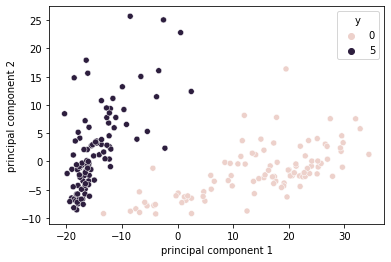

In [256]:
sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2', hue='y')

In [1025]:
sponge_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/sponge/sponge.data', header=None)

In [1112]:
def preprocessing_dataset(data, numeric_col_list):
    scaler = MinMaxScaler()

    data = data.replace({'?' : 0})
    data = data.dropna(axis=0)
    
    X = data.iloc[:,:-1]
    y = data.iloc[:,-1]    
    
    numeric_data = X.iloc[:,numeric_col_list]
    
    cat_data = X.iloc[:,[i not in numeric_col_list for i in range(X.shape[1])]]
    cat_data_ = pd.get_dummies(cat_data)
    
    final_df = pd.concat([cat_data_, numeric_data], axis=1)
    final_df = final_df.astype(float)
    final_X = scaler.fit_transform(final_df)
    
    return(final_X, y)

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

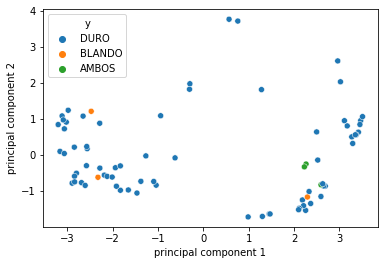

In [1123]:
X_prep, y = preprocessing_dataset(sponge_df, [7,28,37])


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_prep)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf['y'] = y.reset_index(drop=True)
sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2', hue='y')

In [1114]:
y

0       DURO
1       DURO
2       DURO
3       DURO
4       DURO
       ...  
71    BLANDO
72    BLANDO
73      DURO
74      DURO
75      DURO
Name: 45, Length: 76, dtype: object

In [1115]:
#########cylinder band

In [1116]:
cylinder_band_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/cylinder-bands/bands.data',
                               header=None)

In [1103]:
cylinder_band_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       541 non-null    object 
 1   1       541 non-null    object 
 2   2       541 non-null    object 
 3   3       541 non-null    object 
 4   4       541 non-null    object 
 5   5       541 non-null    object 
 6   6       541 non-null    object 
 7   7       541 non-null    object 
 8   8       541 non-null    object 
 9   9       541 non-null    object 
 10  10      541 non-null    object 
 11  11      541 non-null    object 
 12  12      541 non-null    object 
 13  13      541 non-null    object 
 14  14      541 non-null    object 
 15  15      541 non-null    object 
 16  16      541 non-null    float64
 17  17      540 non-null    object 
 18  18      540 non-null    object 
 19  19      540 non-null    object 
 20  20      540 non-null    object 
 21  21      540 non-null    object 
 22  22

In [1104]:
cylinder_band_df[39].value_counts()

noband    312
band      227
Name: 39, dtype: int64

In [1105]:
list(np.arange(20, 39))

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]

In [1106]:
X_prep

array([[1.        , 0.        , 0.        , ..., 0.75      , 1.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.33333333,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.33333333,
        0.25      ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.75      , 0.66666667,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.75      , 0.33333333,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.5       , 0.33333333,
        0.5       ]])

In [1108]:
X

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,19910108,X126,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,50.5,36.4,0,0,2.5,1,34,40,105,100
1,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,54.9,38.5,0,0,2.5,0.7,34,40,105,100
2,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,53.8,39.8,0,0,2.8,0.9,40,40,103.87,100
3,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,55.6,38.8,0,0,2.5,1.3,40,40,108.06,100
4,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,57.5,42.5,5,0,2.3,0.6,35,40,106.67,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,19941005,aa66,kmart,85813,?,key,?,?,gallatin,super,...,?,?,?,?,1,1,?,40,112.5,100
537,19941009,j44,best,38064,?,key,?,?,gallatin,super,...,?,?,?,?,0,0,?,40,110,100
538,19941009,aa58,kmart,85814,?,key,?,?,gallatin,super,...,?,?,?,?,2.7,2.8,?,40,108,100
539,19941010,aa70,kmart,85814,?,key,?,?,gallatin,super,...,?,?,?,?,1.5,2.3,?,40,108,100


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

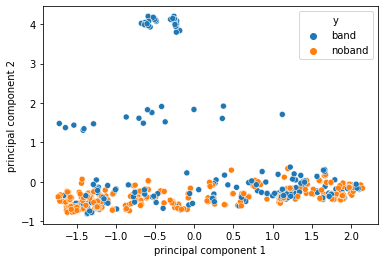

In [1117]:
X = cylinder_band_df.iloc[:,:-1]
y = cylinder_band_df.iloc[:,-1]
#y = np.array([1 if i == 'band' else 0 for i in list(y)])

X_prep, y = preprocessing_dataset(cylinder_band_df, list(np.arange(20, 39)))

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_prep)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf['y'] = y
sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2', hue='y')

In [1120]:
y_ = [1 if i == 'band' else 0 for i in list(y)]

In [1122]:
print(Experiment(X_prep, y_, 2, epsilon=0, max_it= 1000, check=100))

order of connectivity matrix = 1
number of cluster center = 539
...
one cluster center
order 5
[96]
[array([96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96,
       96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96,
       96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96,
       96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96,
       96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96,
       96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96,
       96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96,
       96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96,
       96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96,
       96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96,
       96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96,
       96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96,

<ipython-input-574-55ba005d6ae0>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([result[2], iteration, ARI, NMI, runtime, epsilon])


In [754]:
sponge_info = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/sponge/sponge.info')

ParserError: Error tokenizing data. C error: Expected 2 fields in line 18, saw 3
